# Nonrepresentative Data in Action

In order to generalize well, it is crucial that your training data be representative of the new cases you want to generalize to. This is true whether you use instance-based learning or model-based learning.

It is crucial to use a training set that is representative of the cases you want to
generalize to. This is often harder than it sounds: if the sample is too small, you
will have sampling noise (i.e., nonrepresentative data as a result of chance), but even
very large samples can be nonrepresentative if the sampling method is flawed. This is
called sampling bias.

## Import Libraries

Thoughout the semester when working on ML projects, we will most certainly utilize Python libraries that are often used by data scientists (given that we will be handling data to feed into our models). 

NumPy (or Numpy) is a Linear Algebra Library for Python, the reason it is so important for Data Science with Python is that almost all of the libraries in the PyData Ecosystem rely on NumPy as one of their main building blocks.

Pandas is also an open source library build on top of NumPy. It allows for fast analysis and data cleaning and preparation (and even has a few built-in visualization features).

However, we will be using other libraries. One of them is Matplotlib, which is the most popular plotting library for Python. It gives you control over every aspect of a figure, and was designed to have a similar feel to MatLab's graphical plotting.

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Literary Digest Poll

The table below gives the results of a poll published by The Literary Digest magazine on 31 October 1936 (Halloween, appropriately enough), shortly before the 1936 presidential election. The candidates were Franklin Delano Roosevelt (the incumbent president, a democrat) and Alfred (Alf) Mossman Landon (the republican challenger, then governor of Kansas). Approximately 10,000,000 questionnaires (in the form of postcards) were mailed to prospective voters, making the Literary Digest poll one of the largest ever conducted. Approximately 2,300,000 were returned. The prospective voters were chosen from the subscription list of the magazine, from automobile registration lists, from phone lists, and from club membership lists.

In the data table, the results are given by state. (There were 48 states in 1936.) For each state, the table gives the number of electoral votes, the number of votes for Landon in the poll, and the number of votes for Roosevelt in the poll.

In [151]:
literary_digest = pd.read_table('data-main/literary_digest.tsv',sep='\t')

In [152]:
literary_digest.head()

,State,EV,AML,FDR
0,AL,11,3060,10082
1,AZ,3,2337,1975
2,AR,9,2724,7608
3,CA,22,89516,7608
4,CO,6,15949,10025


In [153]:
literary_digest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   49 non-null     object
 1   EV      49 non-null     int64 
 2   AML     49 non-null     int64 
 3   FDR     49 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [154]:
literary_digest.describe()

,EV,AML,FDR
count,49.00000,49.000000,49.000000
mean,11.22449,26123.285714,17751.530612
std,8.89116,36131.797539,24458.163552
min,3.00000,848.000000,545.000000
25%,5.00000,3686.000000,4507.000000
50%,9.00000,10401.000000,10235.000000
75%,13.00000,31871.000000,19829.000000
max,47.00000,162260.000000,139277.000000


In [155]:
ld_states = literary_digest['State']
ld_landon = literary_digest['AML']
ld_roosevelt = literary_digest['FDR']

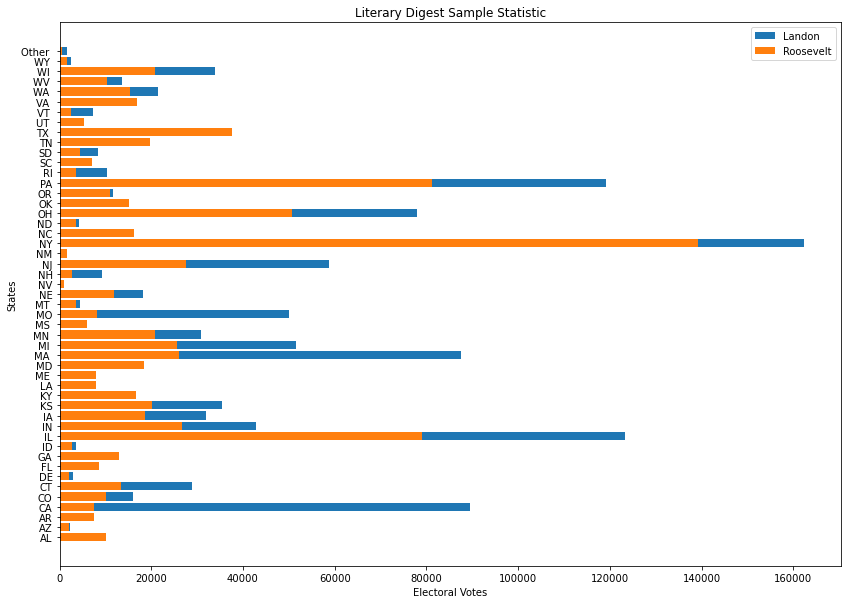

In [156]:
fig = plt.figure(figsize=(14,10))
p1 = plt.barh(ld_states, ld_landon)
p2 = plt.barh(ld_states, ld_roosevelt)
plt.xlabel('Electoral Votes')
plt.title('Literary Digest Sample Statistic')
plt.ylabel('States')
plt.legend((p1[0], p2[0]), ('Landon', 'Roosevelt'))
plt.show()

In [157]:
ld_total_roosevelt = ld_roosevelt.sum()
ld_total_landon = ld_landon.sum()
ld_total_difference = abs(ld_total_roosevelt - ld_total_landon)

In [158]:
print('Franklin D. Roosevelt Total Votes: ' + str(ld_total_roosevelt))
print('Alfred M. Landon Total Votes: ' + str(ld_total_landon))
print('Difference in Total Votes: ' + str(ld_total_difference))

Franklin D. Roosevelt Total Votes: 869825
Alfred M. Landon Total Votes: 1280041
Difference in Total Votes: 410216


## Now, let's look at the actual results of the 1936 Presidential Election

In [159]:
import requests
from bs4 import BeautifulSoup

In [160]:
# Downloading contents of the web page
url = 'https://www.presidency.ucsb.edu/statistics/elections/1936'
data = requests.get(url).text

In [161]:
# Creating BeautifulSoup object
soup = BeautifulSoup(data, 'html.parser')

# Obtain information from tag <table>
table1 = soup.find('table')
#table1

In [162]:
headers = pd.MultiIndex.from_tuples(tuples = [
                                                    ('', 'State'),
                                                    ('', 'Total Vote'),
                                                    ('FDR', 'Votes'), ('FDR', '%'), ('FDR', 'EV'),
                                                    ('AML', 'Votes'), ('AML', '%'), ('AML', 'EV')])
us_election = pd.DataFrame(columns=headers)
us_election.head()

Empty DataFrame
Columns: [(, State), (, Total Vote), (FDR, Votes), (FDR, %), (FDR, EV), (AML, Votes), (AML, %), (AML, EV)]
Index: []

In [163]:
# Create a for loop to fill mydata
for j in table1.find_all('tr')[9:-2]:
 row_data = j.find_all('td')
 row = [i.text for i in row_data]
 length = len(us_election)
 us_election.loc[length] = row

In [164]:
us_election.head()

FDR                AML         
        State Total Vote      Votes     %  EV    Votes     % EV
0     Alabama    275,744    238,196  86.4  11   35,358  12.8   
1     Arizona    124,163     86,722  69.8   3   33,433  26.9   
2    Arkansas    179,431    146,765  81.8   9   32,049  17.9   
3  California  2,638,882  1,766,836  67.0  22  836,431  31.7   
4    Colorado    488,685    295,021  60.4   6  181,267  37.1

In [165]:
us_election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   (, State)       48 non-null     object
 1   (, Total Vote)  48 non-null     object
 2   (FDR, Votes)    48 non-null     object
 3   (FDR, %)        48 non-null     object
 4   (FDR, EV)       48 non-null     object
 5   (AML, Votes)    48 non-null     object
 6   (AML, %)        48 non-null     object
 7   (AML, EV)       48 non-null     object
dtypes: object(8)
memory usage: 3.4+ KB


In [166]:
us_election.describe()

FDR               AML          
          State Total Vote    Votes     %  EV   Votes     %  EV
count        48         48       48    48  48      48    48  48
unique       48         48       48    45  23      48    46   3
top     Alabama    275,744  238,196  60.6  11  35,358  40.3    
freq          1          1        1     2   7       1     2  46

In [167]:
election_states = us_election['']['State']
election_landon = us_election['AML']['Votes']
election_roosevelt = us_election['FDR']['Votes']

### Typical Data Analysis Error Example

In [ ]:
fig = plt.figure(figsize=(14,10))
p1 = plt.barh(election_states, election_landon)
p2 = plt.barh(election_states, election_roosevelt)
plt.xlabel('Electoral Votes')
plt.title('1936 U.S. Election Sample Statistic')
plt.ylabel('States')
plt.legend((p1[0], p2[0]), ('Landon', 'Roosevelt'))
plt.show()

Notice that the dataframe's column, 'Votes' has a string instead of an int64! This will affect our bar plot, so we must fix this.

In [ ]:
us_election.head()

In [ ]:
type(us_election['FDR']['Votes'][0]) # Alabama votes for FDR

This can be fixed with a few lines of python code with our imported libraries. 

In [169]:
# Remove comma punctuation from strings
us_election = us_election.replace(',','', regex=True)
# Convert 'Votes' column into integer type
election_landon = us_election['AML']['Votes'].astype(int)
election_roosevelt = us_election['FDR']['Votes'].astype(int)

In [170]:
us_election.head()

FDR               AML         
        State Total Vote    Votes     %  EV   Votes     % EV
0     Alabama     275744   238196  86.4  11   35358  12.8   
1     Arizona     124163    86722  69.8   3   33433  26.9   
2    Arkansas     179431   146765  81.8   9   32049  17.9   
3  California    2638882  1766836  67.0  22  836431  31.7   
4    Colorado     488685   295021  60.4   6  181267  37.1

###  

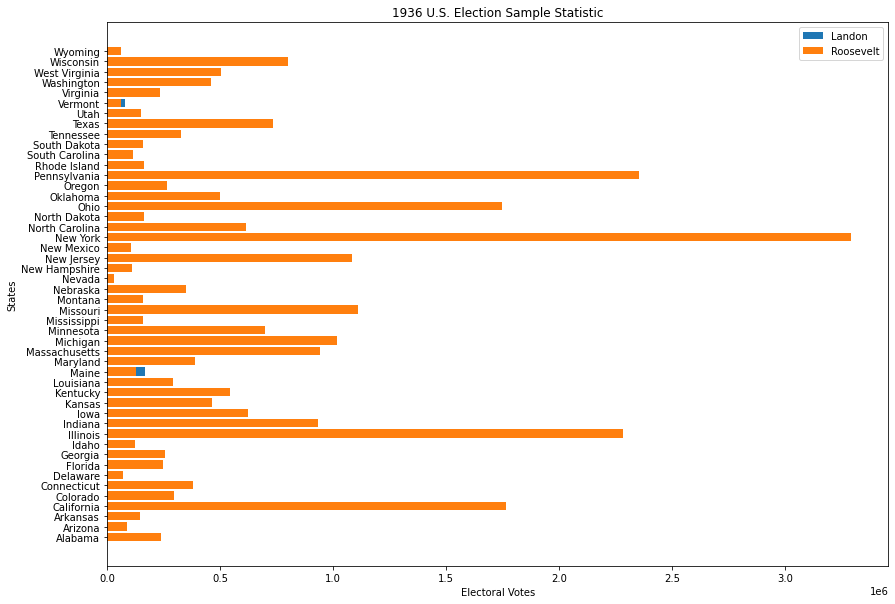

In [171]:
fig = plt.figure(figsize=(14,10))
p1 = plt.barh(election_states, election_landon)
p2 = plt.barh(election_states, election_roosevelt)
plt.xlabel('Electoral Votes')
plt.title('1936 U.S. Election Sample Statistic')
plt.ylabel('States')
plt.legend((p1[0], p2[0]), ('Landon', 'Roosevelt'))
plt.show()

In [172]:
election_total_roosevelt = election_roosevelt.sum()
election_total_landon = election_landon.sum()
election_total_difference = abs(election_total_roosevelt - election_total_landon)

In [174]:
print('Franklin D. Roosevelt Total Votes: ' + str(election_total_roosevelt))
print('Alfred M. Landon Total Votes: ' + str(election_total_landon))
print('Difference in Total Votes: ' + str(election_total_difference))

Franklin D. Roosevelt Total Votes: 27750866
Alfred M. Landon Total Votes: 16679683
Difference in Total Votes: 11071183


## Conclusion

Based on the poll, The Literary Digest predicted that Landon would win the 1936 presidential election with 57.1% of the popular vote and an electoral college margin of 370 to 161. In fact, Roosevelt won the election with 60.8% of the popular vote (27,751,841 to 16,679,491) and an electoral college landslide of 523 to 8 (the largest ever in a presidential election). Roosevelt won 46 of 48 states, losing only Maine and Vermont.

The Literary Digest, using similar techniques, had correctly predicted the outcome of the last four presidential elections. But in this case, the magazine was not just wrong, it was spectacularly wrong. In part because of the subsequent loss of prestige and credibility, the magazine died just two years later.

What went wrong? Clearly the sample was skewed towards wealthier voters—those who could afford magazine subscriptions, cars, phones, and club memberships in the depths of the Great Depression. This sort of bias would not matter if wealthier voters behaved in a similar manner to voters as a whole (as was basically the case in the previous four elections). But in 1936, at a time of great tension between economic classes, this was definitely not the case.

Another problem, not easily understood, is self-selection bias. Were the voters who chose to return the questionnaires different, in terms of how they planned to vote, from the voters who did not respond?